## Dataset  - Drivers

Realizando uma análise prévia dos dados do dataset drivers.csv, afim de encontrar algumas informações relevantes para o negócio.

In [9]:
# Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
%matplotlib inline

In [13]:
# Realizando leitura dos dados
drivers_dataset = pd.read_csv('dados/drivers.csv')

In [3]:
# Leitura e visualização dos dados
drivers_dataset = pd.read_csv('dados/drivers.csv')
drivers_dataset.head()

,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE
3,143,BIKER,FREELANCE
4,148,MOTOBOY,FREELANCE


### Verificando a porporção de cada tipo de Entregador

In [4]:
motorista = drivers_dataset.driver_modal.value_counts()
motorista

MOTOBOY    3222
BIKER      1602
Name: driver_modal, dtype: int64

In [5]:
# Podemos calcular com base nos dados a porcentagem que cada um representa na população dos dados
qtd_biker = motorista.BIKER
qtd_motoboy = motorista.MOTOBOY
qtd_total = drivers_dataset.driver_modal.count()

proporcao_motoboy = (qtd_motoboy / qtd_total) * 100
proporcao_biker   = (qtd_biker / qtd_total) * 100

print(f'A Quantidade de Motocilistas, equivalem a {proporcao_motoboy:.2f} %')
print(f'A Quantidade de Bikers, equivalem a {proporcao_biker:.2f} %')     

A Quantidade de Motocilistas, equivalem a 66.79 %
A Quantidade de Bikers, equivalem a 33.21 %


#### No gráfico abaixo, podemos confirmar que, de acordo com os dados disponibilizados, o quantidade de motoqueiros é maior que a quantidade de Bikers

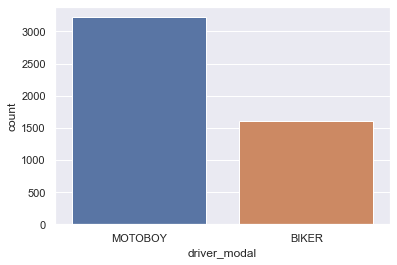

In [11]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="driver_modal", data=drivers_dataset)

In [15]:
motorista.head()

MOTOBOY    3222
BIKER      1602
Name: driver_modal, dtype: int64

### Podemos verficar também a porporção do tipo de motorista com base no tipo de Entregador

In [30]:
# Para isso, precisaremos criar um subset do dataset com os campos que iremos utilizar
subset = drivers_dataset.groupby(['driver_modal','driver_type'])['driver_type'].count()
pd.DataFrame(subset)

driver_type
driver_modal driver_type                   
BIKER        FREELANCE                 1601
             LOGISTIC OPERATOR            1
MOTOBOY      FREELANCE                 2338
             LOGISTIC OPERATOR          884

In [31]:
# Realizando calculos

# Primeiro é necessário saber a quantidade de entregador de cada categoria
motorista = drivers_dataset.driver_modal.value_counts()
total_biker = motorista.BIKER
total_motoboy = motorista.MOTOBOY

# Agora poderemos realizar o calculo de Proporcionalidade para os mesmos

# Bikers
proporcao_biker_freelance =     (1601 / total_biker) * 100
proporcao_biker_logistic_oper = (1   /  total_biker) * 100

# Motoboys
proporcao_moboboy_freelance =     (2338 / total_motoboy) * 100
proporcao_moboboy_logistic_oper = (884 / total_motoboy)  * 100


In [42]:
dicionario = {
    'ENTREGADOR' : ['BIKER','BIKER','MOTOBOY','MOTOBOY'],
    'TIPO'       : ['FREELANCER','LOGISTIC OPERATOR','FREELANCER','LOGISTIC OPERATOR'],
    'PROPORÇÃO'  : [proporcao_biker_freelance, proporcao_biker_logistic_oper,
                    proporcao_moboboy_freelance,proporcao_moboboy_logistic_oper ]
}

resultado = pd.DataFrame(dicionario)
lista_proporcao = list(resultado.PROPORÇÃO)
resultado['PROPORÇÃO'] = [f'{x:.2f} %' for x in lista_proporcao]
resultado

,ENTREGADOR,TIPO,PROPORÇÃO
0,BIKER,FREELANCER,99.94 %
1,BIKER,LOGISTIC OPERATOR,0.06 %
2,MOTOBOY,FREELANCER,72.56 %
3,MOTOBOY,LOGISTIC OPERATOR,27.44 %


Podemos dizer então que, do total de Bikers, <b>99,94%</b> são Freelancer, enquanto que apenas <b>0.06 %</b> São Logistic Operators<br/>
Já no caso dos Motoboys, <b>72.56 % </b> São freelancer, enquanto <b>27.44 %</b> são Logistic Operators.